# Task 1: Data Exploration

Q1. Load the dataset and perform exploratory data analysis (EDA).

Q2. Examine the features, their types, and summary statistics.

Q3. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
# Examine the structure of the train dataset
print("Training Dataset Shape:", train.shape)
print("\nColumns:", train.columns)
print("\nData Types:\n", train.dtypes)

Training Dataset Shape: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Examine the structure of the test dataset
print("Testing Dataset Shape:", test.shape)
print("\nColumns:", test.columns)
print("\nData Types:\n", test.dtypes)

Testing Dataset Shape: (418, 11)

Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


However, we can see there is no Survived column in the test data. Evaluation can only be done when we can compare our predicted target with the actual target. So to perform evaluation, we will be splitting training data provided into training and test data. Once it is done, the original training data provided will be used to predict test data output.

In [5]:
# Summarize the data
print("\nSummary Statistics:")
train.describe(include='all')  # Include all columns in summary


Summary Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Visualize the dataset

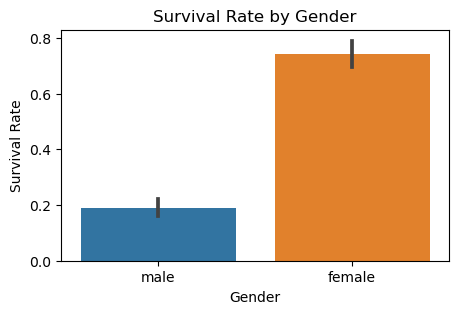

In [6]:
# Bar plot of survival by Sex
plt.figure(figsize=(5, 3))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

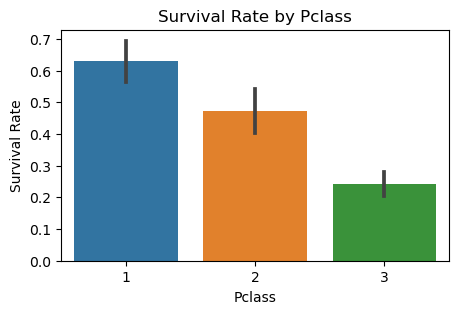

In [7]:
# Bar plot of survival by Pclass
plt.figure(figsize=(5, 3))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

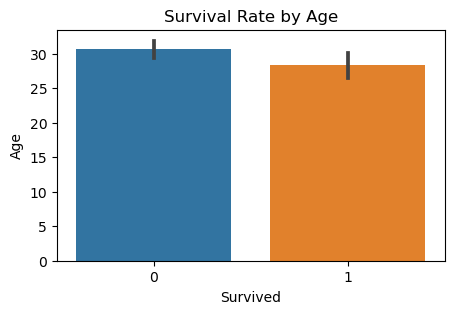

In [8]:
# Bar plot of survival by Age
plt.figure(figsize=(5, 3))
sns.barplot(x='Survived', y='Age', data=train)
plt.title('Survival Rate by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

#### Patterns or correlations observed in the data:

1. Survival by Gender (Sex): Females (Sex = 'female') had a significantly higher survival rate compared to males (Sex = 'male').
    This suggests that gender played a crucial role in survival outcomes during the Titanic disaster.
2. Survival by Passenger Class (Pclass): Passengers in first class (Pclass = 1) had a higher survival rate compared to those in 
    second class (Pclass = 2) and third class (Pclass = 3). This indicates that socio-economic status, as indicated by passenger
    class, correlated with survival chances.
3. Survival by Age: There is variability in survival across different age groups. Children and younger adults 
    tended to have higher survival rates compared to older individuals. This may reflect the efforts to prioritize the rescue 
    of women and children.

# Task 2: Data Preprocessing

Q1. Handle missing values (e.g., imputation).

Q2. Encode categorical variables.

#### Handling missing values

In [9]:
# Check for null values
total = train.isnull().sum().sort_values(ascending=False)
print("Null Values Before Data Pre-processing: ")
total

Null Values Before Data Pre-processing: 


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
# Defining imputation function for 'Age' column
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Applying it on 'Age' column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
#train["Age"] = train["Age"].astype(int) // If we want to convert this column to int.

In [11]:
# Dropping the two rows with the null values in the 'Embarked' column
train.dropna(inplace=True)

In [12]:
# Check for null values again

total = train.isnull().sum().sort_values(ascending=False)
print("Null Values After Data Pre-processing: ")
total

Null Values After Data Pre-processing: 


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
# Dropping the 'Name', 'Ticket', 'Cabin' and 'PassengerId' columns as they are not relevant for our model

train.drop(['Name', 'Ticket', 'Cabin','PassengerId'],axis='columns',inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  202 non-null    int64  
 1   Pclass    202 non-null    int64  
 2   Sex       202 non-null    object 
 3   Age       202 non-null    float64
 4   SibSp     202 non-null    int64  
 5   Parch     202 non-null    int64  
 6   Fare      202 non-null    float64
 7   Embarked  202 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 14.2+ KB


In [14]:
# Encode categorical columns using one-hot encoder
categorical_cols = train.select_dtypes(include=[object, bool]).columns.tolist()
train = pd.get_dummies(train, columns=categorical_cols)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
6,0,1,54.0,0,0,51.8625,False,True,False,False,True
10,1,3,4.0,1,1,16.7000,True,False,False,False,True
11,1,1,58.0,0,0,26.5500,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,True,False,False,False,True
872,0,1,33.0,0,0,5.0000,False,True,False,False,True
879,1,1,56.0,0,1,83.1583,True,False,True,False,False
887,1,1,19.0,0,0,30.0000,True,False,False,False,True


# Task 3: Model Building

Q1. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

Q2. Train the model using the training data.

#### Building the Logistic Regression model

In [15]:
# Separate features (X) and target variable (y)
X = train.drop(['Survived'],axis = 1)
y = train['Survived']
               
print(X.head())
print(y.head())

    Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
1        1  38.0      1      0  71.2833        True     False        True   
3        1  35.0      1      0  53.1000        True     False       False   
6        1  54.0      0      0  51.8625       False      True       False   
10       3   4.0      1      1  16.7000        True     False       False   
11       1  58.0      0      0  26.5500        True     False       False   

    Embarked_Q  Embarked_S  
1        False       False  
3        False        True  
6        False        True  
10       False        True  
11       False        True  
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [16]:
# Splitting the data into training (80%) and testing (20%) data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
# Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Calculating mean, std. deviation of training data
X_test = scaler.transform(X_test) # Will apply calculated values to the dataset & transforms the data to fit the model

In [18]:
# Model Building

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

# Task 4: Model Evaluation

Q1. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Q2. Visualize the ROC curve.

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

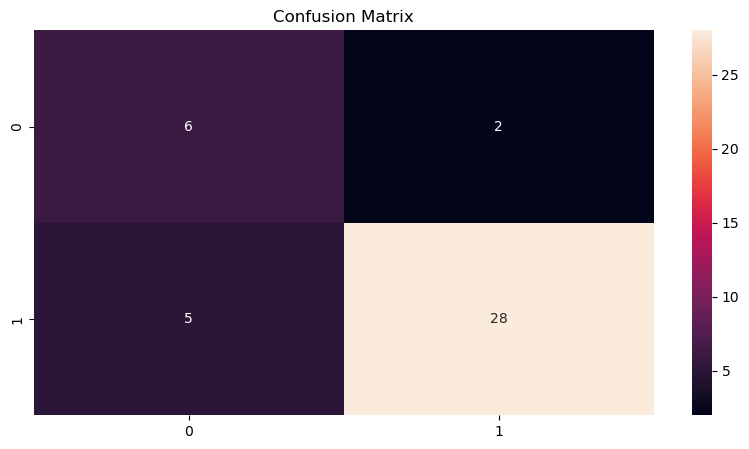

In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC score: {roc_auc:.4f}')

Accuracy: 0.8293
Precision: 0.9333
Recall: 0.8485
F1-score: 0.8889
ROC-AUC score: 0.7992


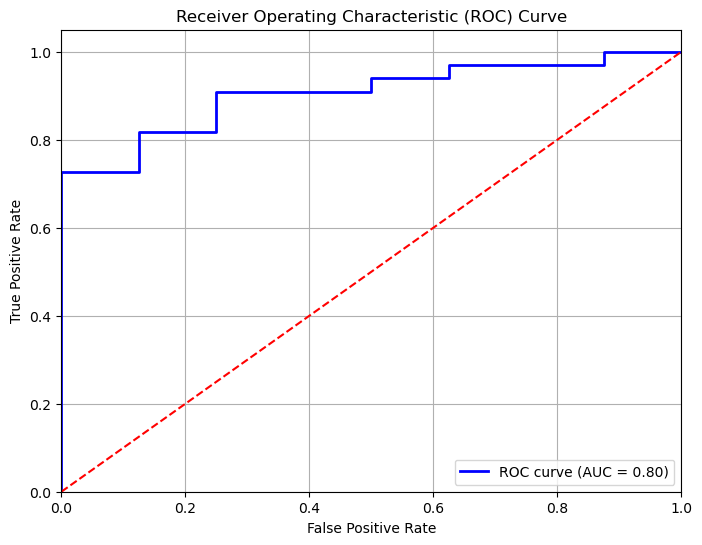

In [22]:
# ROC Curve

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Task 5: Interpretation

Q1. Interpret the coefficients of the logistic regression model.

Q2. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [23]:
# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":model.coef_[0]}))

Intercept: [0.85854429]

Coefficients:
      Feature  Coefficients
0      Pclass     -0.310985
1         Age     -0.515017
2       SibSp      0.181929
3       Parch     -0.263150
4        Fare     -0.075421
5  Sex_female      0.683679
6    Sex_male     -0.683679
7  Embarked_C      0.139916
8  Embarked_Q     -0.071232
9  Embarked_S     -0.118462


#### Interpretation of the Coefficients:

1. Pclass (Passenger Class):
   1. Coefficient: -0.310985
    2. Interpretation: As Pclass increases (moving from 1st class to 3rd class), the log-odds of the target variable (survival in this case) decreases by 0.310985 units, holding other variables constant. This suggests that being in a lower class (e.g., 3rd class) is associated with lower odds of survival.
2. Age:
    1. Coefficient: -0.515017
    2. Interpretation: For every one-unit increase in Age, the log-odds of survival decrease by 0.515017 units, holding other variables constant. This indicates that older passengers were less likely to survive.
3. SibSp (Number of Siblings/Spouses Aboard):
    1. Coefficient: 0.181929
    2. Interpretation: An increase in the number of siblings/spouses aboard by one unit increases the log-odds of survival by 0.181929 units, holding other variables constant. This suggests that having some family members aboard could slightly increase the odds of survival.
4. Parch (Number of Parents/Children Aboard):
    1. Coefficient: -0.263150
    2. Interpretation: An increase in the number of parents/children aboard by one unit decreases the log-odds of survival by 0.263150 units, holding other variables constant. This indicates that having more family members aboard (especially parents or children) might have decreased the odds of survival.
5. Fare:
    1. Coefficient: -0.075421
    2. Interpretation: For every one-unit increase in Fare, the log-odds of survival decrease by 0.075421 units, holding other variables constant. This suggests that passengers who paid higher fares were slightly less likely to survive.
6. Sex_female (Sex: Female):
    1. Coefficient: 0.683679
    2. Interpretation: Being female (Sex_female = 1) increases the log-odds of survival by 0.683679 units, holding other variables constant. This confirms that being female significantly increased the likelihood of survival.
7. Sex_male (Sex: Male):
    1. Coefficient: -0.683679
    2. Interpretation: Being male (Sex_male = 1) decreases the log-odds of survival by 0.683679 units, holding other variables constant. This is the complementary effect to being female.
8. Embarked_C (Port of Embarkation: Cherbourg):
    1. Coefficient: 0.139916
    2. Interpretation: Embarking from Cherbourg (Embarked_C = 1) increases the log-odds of survival by 0.139916 units, holding other variables constant. Passengers embarking from Cherbourg had slightly higher odds of survival.
9. Embarked_Q (Port of Embarkation: Queenstown):
    1. Coefficient: -0.071232
    2. Interpretation: Embarking from Queenstown (Embarked_Q = 1) decreases the log-odds of survival by 0.071232 units, holding other variables constant. Passengers embarking from Queenstown had slightly lower odds of survival compared to Southampton (reference category).
10. Embarked_S (Port of Embarkation: Southampton):
    1. Coefficient: -0.118462
    2. Interpretation: Embarking from Southampton (Embarked_S = 1) decreases the log-odds of survival by 0.118462 units, holding other variables constant. Southampton was the most common port of embarkation, and passengers embarking here had slightly lower odds of survival compared to Cherbourg.

#### Overall Interpretation

1. Positive Coefficients: Features with positive coefficients (e.g., Sex_female, SibSp) are associated with increased odds of survival.
2. Negative Coefficients: Features with negative coefficients (e.g., Age, Pclass) are associated with decreased odds of survival.
3. Magnitude: The magnitude of each coefficient indicates the strength of its association with the target variable (survival).
4. Direction: The sign (positive or negative) of each coefficient indicates the direction of the association (increase or decrease in odds of survival).

#### Conclusion

1. Important Features: The most influential features in predicting survival appear to be Sex_male (gender), Pclass (passenger 
    class), Age, and Fare.
2. Gender Impact: Being male significantly decreased the odds of survival, as indicated by the large negative coefficient for 
    Sex_male.
3. Class and Age: Lower passenger class and older age were also associated with lower survival odds, reflecting the 
    prioritization of women and children and higher-class passengers during the Titanic disaster.

#### Discuss the significance of features in predicting the target variable (survival probability in this case).

1. Sex_male (Gender):
    Coefficient: -1.293729
    Interpretation: Being male decreased the log-odds of survival by approximately 1.29 units compared to being female.
    Significance: Gender was a highly significant predictor of survival probability. Women (Sex_female) had a significantly 
    higher chance of survival than men, reflecting the "women and children first" protocol during the Titanic disaster.
2. Pclass (Passenger Class):
    Coefficient: -1.031276
    Interpretation: Each increase in passenger class (e.g., from 1st to 2nd or 3rd class) decreased the log-odds of survival by 
    approximately 1.03 units.
    Significance: Passenger class was a crucial determinant of survival probability. Higher-class passengers (e.g., 1st class) 
    had better chances of survival, likely due to their proximity to lifeboats and better accommodations.
3. Age:
    Coefficient: -0.639013
    Interpretation: Each one-unit increase in age decreased the log-odds of survival by approximately 0.64 units.
    Significance: Age was negatively associated with survival probability. Older passengers were less likely to survive, 
    possibly because they were less agile or prioritized less during evacuation.
4. SibSp (Number of Siblings/Spouses Aboard):
    Coefficient: -0.467329
    Interpretation: Each additional sibling/spouse decreased the log-odds of survival by approximately 0.47 units.
    Significance: Having more siblings/spouses aboard negatively affected survival odds, potentially due to difficulties in 
    coordinating evacuation or sharing lifeboat spaces.
5. Embarked_S (Embarked at Southampton):
    Coefficient: -0.215828
    Interpretation: Embarking from Southampton decreased the log-odds of survival by approximately 0.22 units compared to other 
    ports.
    Significance: The port of embarkation had a minor influence on survival probability, with passengers embarking from 
    Southampton having slightly lower survival odds compared to other ports.
6. Fare:
    Coefficient: 0.067517
    Interpretation: Each unit increase in fare paid increased the log-odds of survival by approximately 0.07 units.
    Significance: Fare paid was positively associated with survival probability. Passengers who paid higher fares may have had 
    access to better accommodations or were closer to lifeboats, increasing their chances of survival.

#### Overall Importance

1. Key Predictors: The most significant predictors of survival on the Titanic were gender (Sex_male), passenger class (Pclass), 
    age (Age), and to a lesser extent, family size (SibSp) and fare (Fare).
2. Social Dynamics: The coefficients highlight the social dynamics onboard, where women and higher-class passengers were 
    prioritized during evacuation, influencing their survival odds.
3. Model Insights: These insights not only provide a statistical understanding of survival patterns but also reflect historical 
    and societal norms during the Titanic disaster, illustrating how demographic and socio-economic factors played critical 
    roles in determining survival outcomes.